In [1]:
import csv
import subprocess
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.precision", 10)

In [48]:
fdf = pd.read_csv('fitting.csv')

In [49]:
np.array(fdf['Code'])

array([1588, 1595, 1601, 1608, 1615, 1622, 1644, 1654, 1660, 1665, 1668,
       1672, 1677, 1683, 1713, 1721, 1724, 1743, 1746, 1749, 1752, 1755,
       1757, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768,
       1769, 1770, 1771, 1772, 1774, 1775, 1777, 1779, 1780, 1782, 1784,
       1786, 1789, 1791, 1793, 1796, 1798, 1800, 1801, 1802, 1803, 1804,
       1805, 1807, 1809, 1810, 1812, 1814, 1815, 1817, 1816, 1818, 1820,
       1821, 1823, 1824, 1825, 1827, 1831, 1832, 1833, 1834, 1846, 1859,
       1868, 1876, 1884, 1893, 1901, 2016, 2024, 2062, 2068, 2073, 2088,
       2100, 2106, 2110, 2000, 2006, 2011, 2115, 2119, 2123, 2157, 2159,
       2160, 2161, 2162, 2163, 2164, 2165, 2166, 2167])

### Make new blank file

In [29]:
arr = np.arange(2000, 2150.0015, 0.0015)
ones = np.ones(len(arr))

In [30]:
df = pd.DataFrame({'wavenumber': arr, 'one': ones })

In [32]:
df.to_csv('co2-2000-2150_0^0015cm-1.csv')

### Interpolate mixing ratio

In [16]:
pressures = np.array([11.79, 47.33, 75.19, 112.05, 299.92, 521.86, 744.22, 1010.58])
mixing_ratios = np.array([0.143551, 0.031886, 0.049121, 0.042584, 0.044708, 0.038422, 0.026773, 0.01974])

# New pressure values for interpolation
new_pressures = np.arange(1000, 0, -20)

# Interpolated mixing ratios
interpolated_ratios = np.interp(new_pressures, pressures, mixing_ratios)

df = pd.DataFrame({'Pressure (mbar)': new_pressures, 'Interpolated Mixing Ratio': interpolated_ratios })

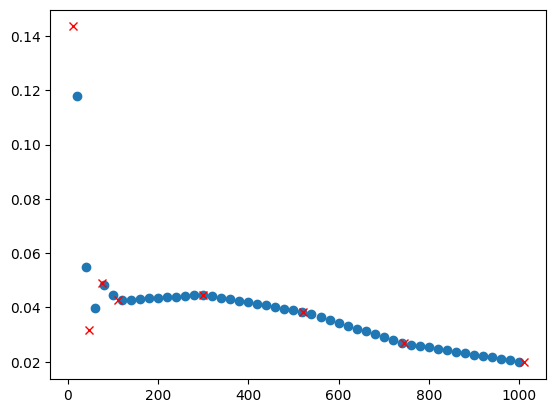

In [17]:
plt.plot(new_pressures, interpolated_ratios, 'o')
plt.plot(pressures, mixing_ratios, 'x', color = 'r')

In [19]:
df.to_csv('inter_mr.csv')

### Plot m

In [33]:
def add_m(file):
    yy = pd.read_csv(file)
    filteryy = yy[(yy['Dicke'] != 0) & (yy['Speed'] != 0)]
    filteryyy = filteryy[(filteryy['Position'] > 0.5)]

    adf = filteryy[(filteryy['Position'] < 0.5)]
    dke = np.array(adf['Dicke'])[1:]
    sde = np.array(adf['Speed'])[1:]
    filteryyy['Dicke_err'] = dke
    filteryyy['Speed_err'] = sde

    
    filteryyy['m'] = np.arange(-54, -4, 2)
    #filteryyy.to_csv(f'{file}_mdf.csv')
    
    return filteryyy       

In [34]:
yo = add_m('newver_ils_snr1000_ls.csv')

### old

In [56]:
def add_m(file):
    tt = pd.read_csv('CO2_hitran.par', sep='\s+', header = None, names=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j', 'k', 'l', 'o', 'p'])
    tt['m'] = tt['h'].str.extract(r'(\d+)')
    tt['a']=tt['a'].round(4)
    #rdf = tt[tt['a'] == 2039.9233]

    yy = pd.read_csv(file)
    filteryy = yy[(yy['Dicke'] != 0) & (yy['Speed'] != 0)]
    filteryy['Position']=filteryy['Position'].round(4)
    filteryyy = filteryy[(filteryy['Position'] > 0.5)]

    adf = filteryy[(filteryy['Position'] < 0.5)]
    dke = np.array(adf['Dicke'])
    sde = np.array(adf['Speed'])
    filteryyy['Dicke_err'] = dke
    filteryyy['Speed_err'] = sde

    filtered_df = tt[tt['a'].isin(filteryyy['Position'])]
    #filtered_df = pd.concat([filtered_df, rdf], ignore_index = True)
    #filtered_df = filtered_df.sort_values(by='a', ascending=True)
    if len(filtered_df) != len(filteryyy):
        diff = abs(len(filtered_df)-len(filteryyy))
        print(f'missing {diff} lines')
        r = np.array(filtered_df['m'].astype('float'))
        filteryyy['m'] = r * -1
    else:
        r = np.array(filtered_df['m'].astype('float'))
        filteryyy['m'] = r * -1
    filteryyy.to_csv(f'dw_{file}')
    
    return filteryyy        

### now

In [195]:
df10p = yo
df10p

,Code #,Position,Dicke,Speed,Dicke_err,Speed_err,m
160,1608.0,2035.4054,0.0292,0.0933,0.0086,0.0459,-54.0
174,1615.0,2036.9082,0.0324,0.1081,0.0055,0.0248,-52.0
232,1644.0,2038.4142,0.0357,0.0529,0.0046,0.0206,-50.0
252,1654.0,2039.9232,0.0386,0.0519,0.0042,0.0202,-48.0
264,1660.0,2041.4353,0.0289,0.1144,0.0020,0.0087,-46.0
274,1665.0,2042.9503,0.0266,0.1039,0.0021,0.0093,-44.0
280,1668.0,2044.4681,0.0318,0.0843,0.0020,0.0076,-42.0
288,1672.0,2045.9886,0.0284,0.1067,0.0024,0.0057,-40.0
298,1677.0,2047.5117,0.0246,0.1164,0.0015,0.0060,-38.0
310,1683.0,2049.0374,0.0302,0.1053,0.0012,0.0043,-36.0


In [38]:
dff =pd.read_csv('pr_1000_20mbar_df_newnew.csv')
dff

,Unnamed: 0,Code #,Position,Dicke,Speed,Dicke_err,Speed_err,m
0,0,1608.0,2035.4054,0.02540,0.12854,0.00256,0.00518,-54.0
1,2,1615.0,2036.9082,0.02641,0.11440,0.00206,0.00430,-52.0
2,4,1644.0,2038.4142,0.02744,0.11166,0.00164,0.00327,-50.0
3,6,1654.0,2039.9232,0.02713,0.11304,0.00135,0.00248,-48.0
4,8,1660.0,2041.4353,0.02852,0.10847,0.00117,0.00206,-46.0
5,10,1665.0,2042.9503,0.02956,0.10182,0.00105,0.00178,-44.0
6,12,1668.0,2044.4681,0.02950,0.09795,0.00095,0.00153,-42.0
7,14,1672.0,2045.9886,0.02978,0.09636,0.00089,0.00138,-40.0
8,16,1677.0,2047.5117,0.03026,0.09867,0.00085,0.00119,-38.0
9,18,1683.0,2049.0374,0.03040,0.09673,0.00082,0.00109,-36.0


In [39]:
def plot_m(df, label):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.errorbar(df['m'], df['Dicke'], yerr=df['Dicke_err'], fmt='o',  color = 'black', capsize=5, label = label)
    ax1.set_xlabel('m')
    ax1.set_ylabel('Dicke')
    ax1.set_ylim(0.01, 0.05)
    #ax1.set_ylim(0, 0.02)
    #ax1.axhline(y=0.03, color='r', linestyle='--')
    #ax1.legend()

    ax2.errorbar(df['m'], df['Speed'], yerr=df['Speed_err'], fmt='o', capsize=5,  color = 'black', label = label)
    ax2.set_xlabel('m')
    ax2.set_ylabel('Speed')
    ax2.set_ylim(0, 0.2)
    #ax2.axhline(y=0.1, color='r', linestyle='--')
    #ax2.legend()
    
    fig.suptitle('Air-broadened spectra with pressure in 20(mbar) increments, SNR 2000')
    plt.savefig(f'{label}.png')
    plt.show()

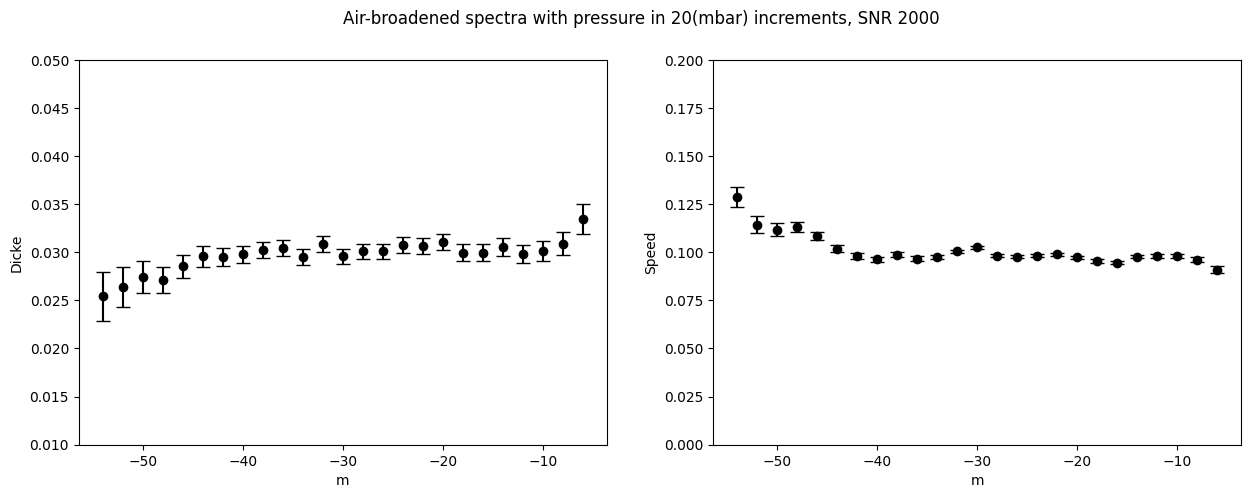

In [40]:
plot_m(dff, 'dpr_50spec_snr2000_mplot')

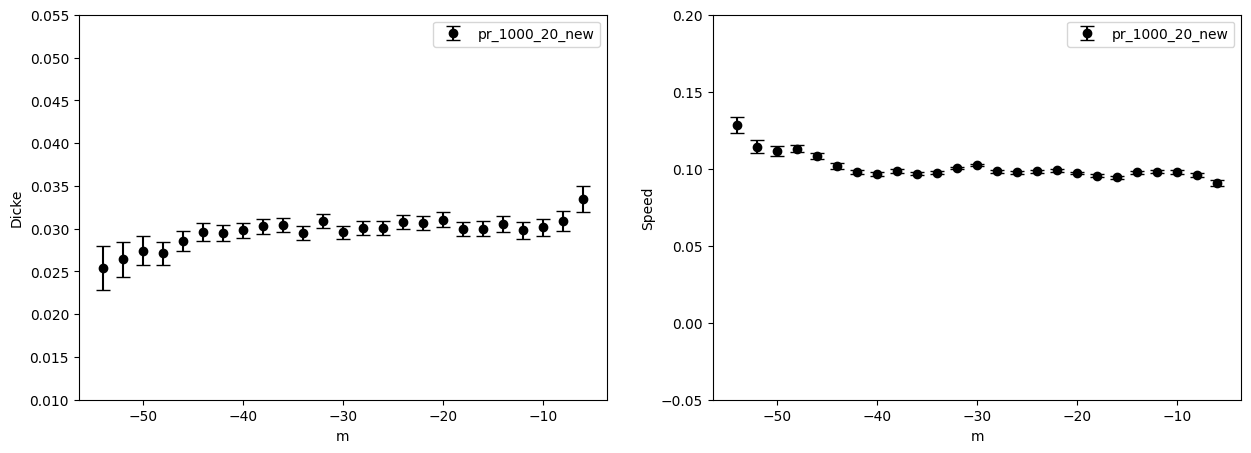

In [28]:
plot_m(filteryyy, 'pr_1000_20_new')

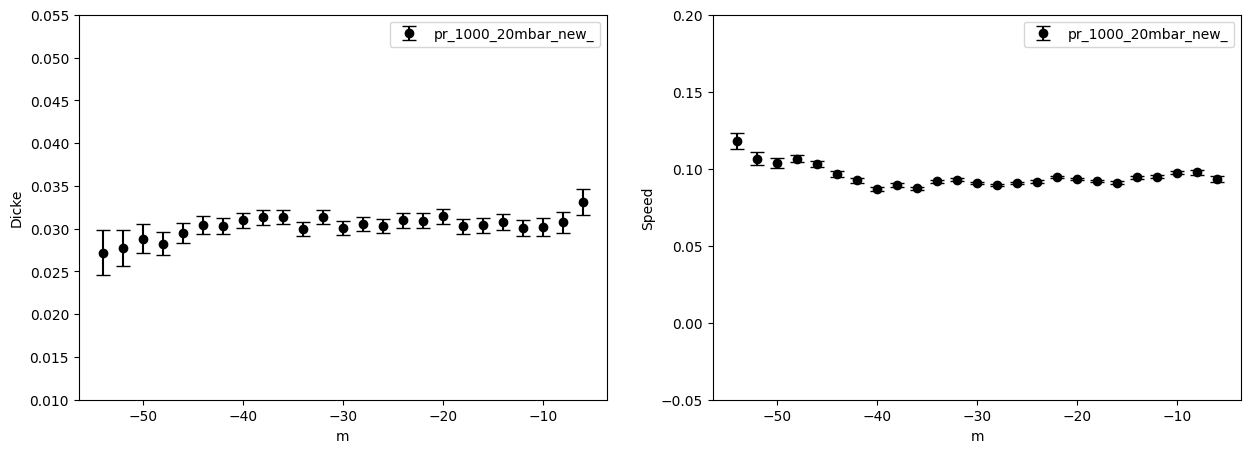

In [104]:
plot_m(pr_df, 'pr_1000_20mbar_new_')

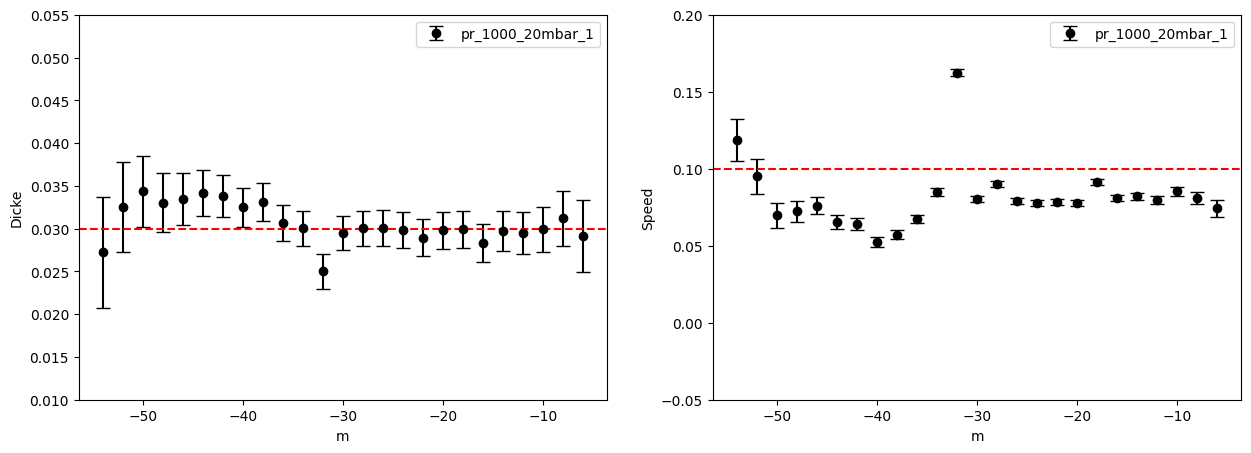

In [8]:
plot_m(yo, 'pr_1000_20mbar_1')

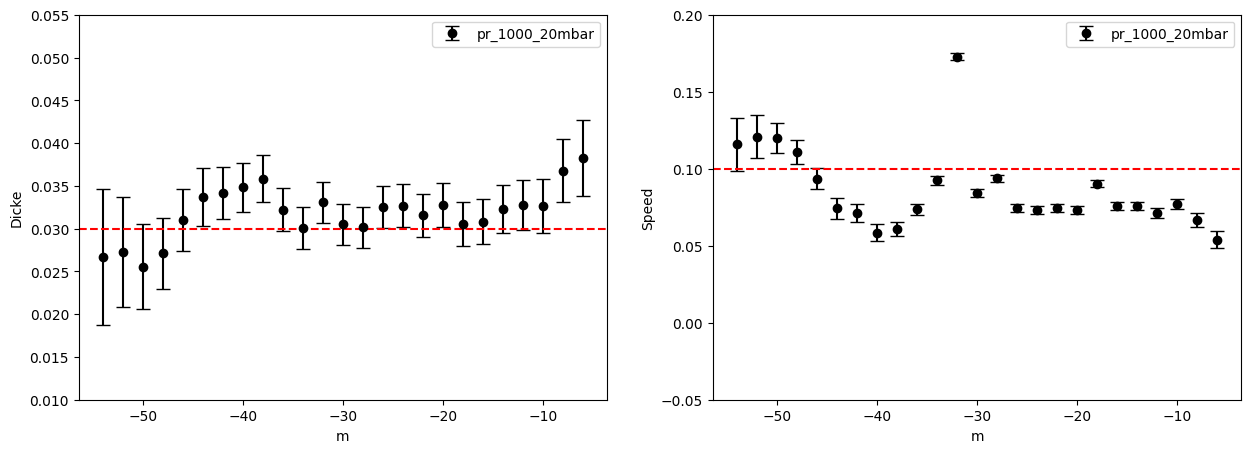

In [35]:
plot_m(pr_df, 'pr_1000_20mbar')

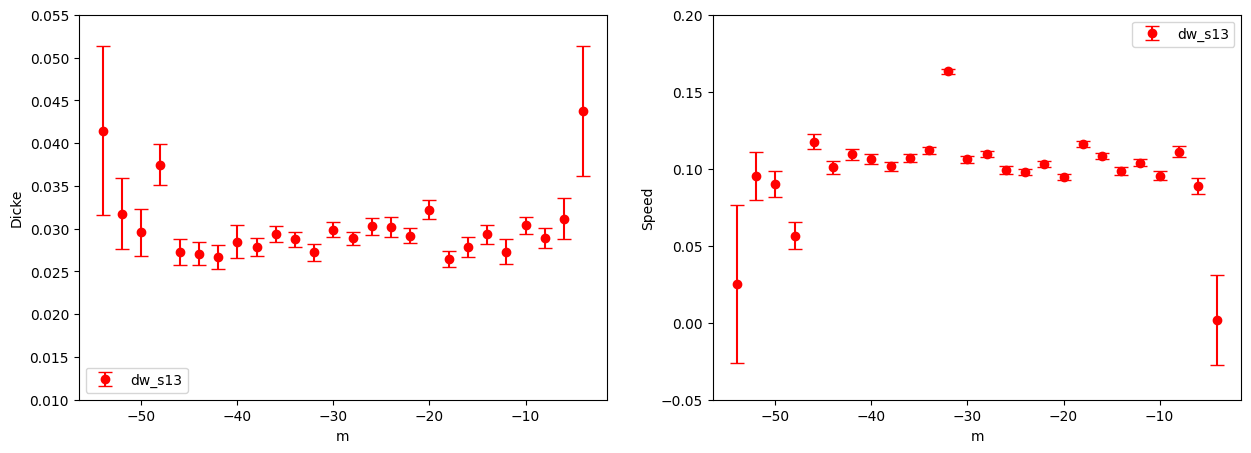

In [201]:
plot_m(df13, 'dw_s13')

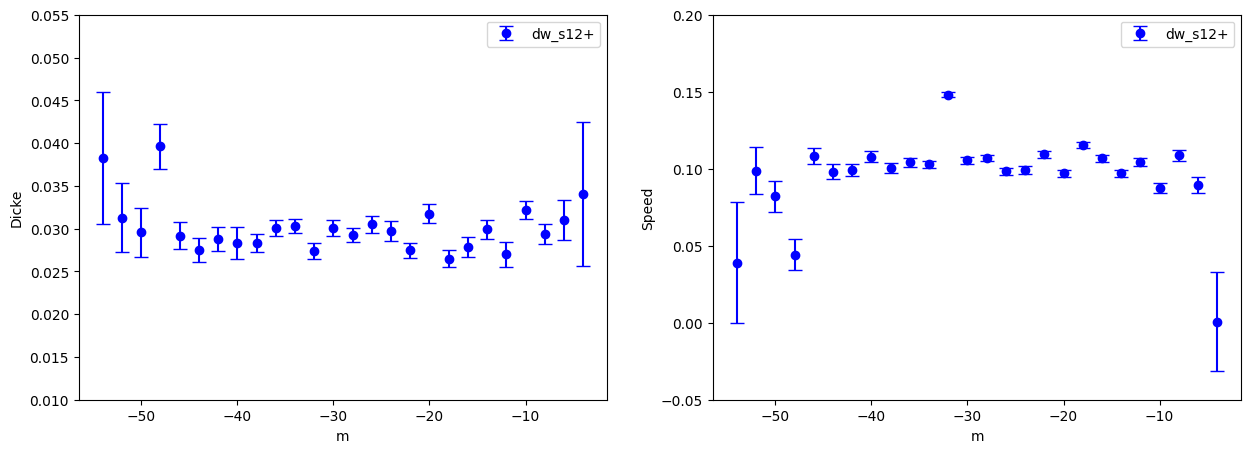

In [204]:
plot_m(df12p, 'dw_s12+')

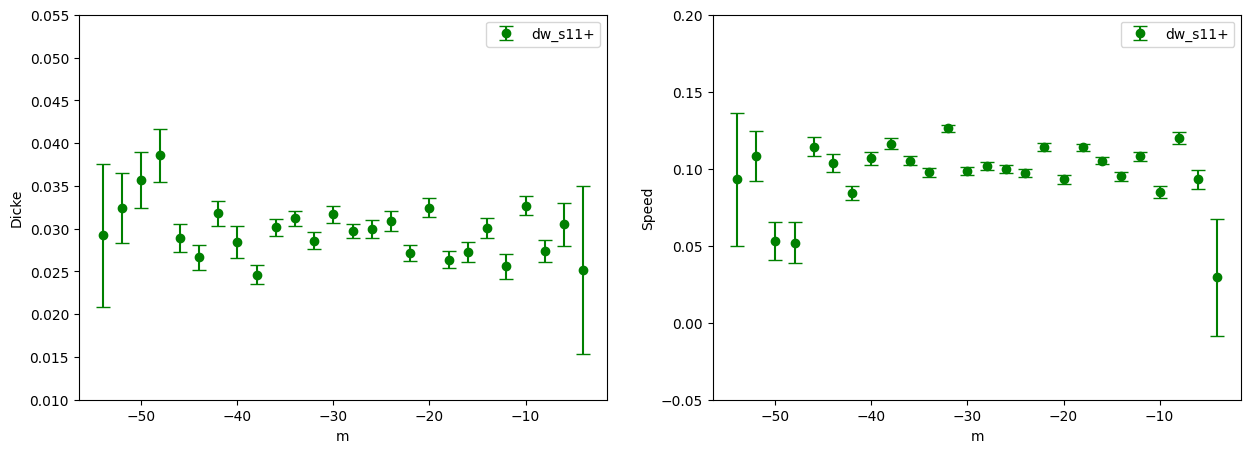

In [206]:
plot_m(df11p, 'dw_s11+')

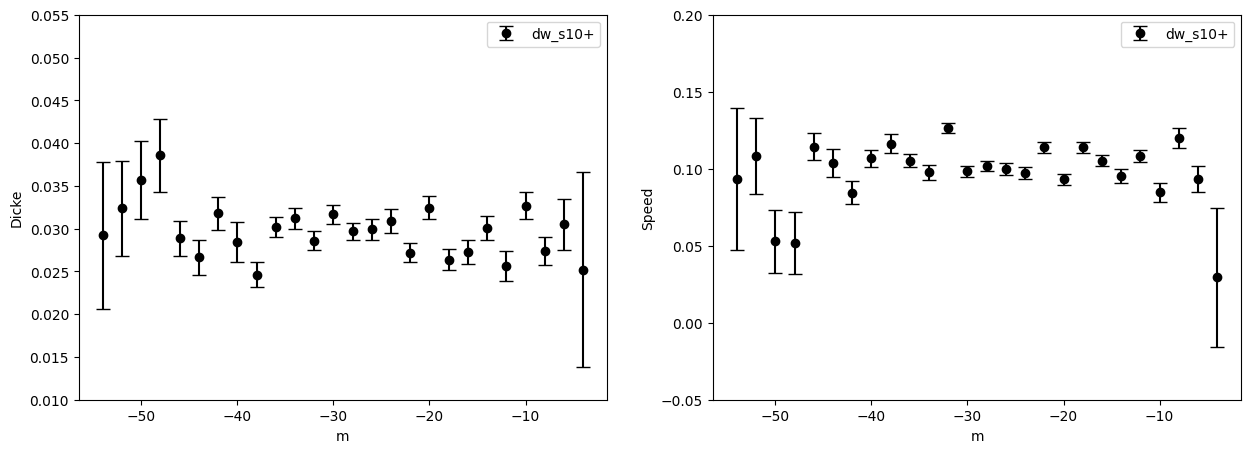

In [208]:
plot_m(df10p, 'dw_s10+')

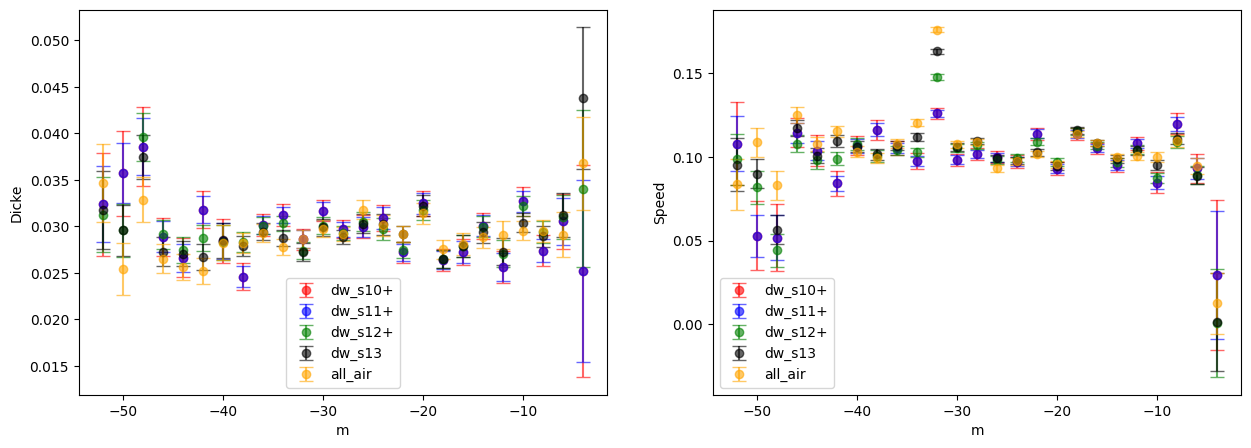

In [197]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.errorbar(df10p['m'][1:], df10p['Dicke'][1:], yerr=df10p['Dicke_err'][1:], fmt='o',  color = 'r', capsize=5, label = 'dw_s10+', alpha = 0.6)
ax1.errorbar(df11p['m'][1:], df11p['Dicke'][1:], yerr=df11p['Dicke_err'][1:], fmt='o',  color = 'b', capsize=5, label = 'dw_s11+', alpha = 0.6)
ax1.errorbar(df12p['m'][1:], df12p['Dicke'][1:], yerr=df12p['Dicke_err'][1:], fmt='o',  color = 'g', capsize=5, label = 'dw_s12+', alpha = 0.6)
ax1.errorbar(df13['m'][1:], df13['Dicke'][1:], yerr=df13['Dicke_err'][1:], fmt='o',  color = 'black', capsize=5, label = 'dw_s13', alpha = 0.6)
ax1.errorbar(airdf['m'][1:], airdf['Dicke'][1:], yerr=airdf['Dicke_err'][1:], fmt='o',  color = 'orange', capsize=5, label = 'all_air', alpha = 0.6)
ax1.set_xlabel('m')
ax1.set_ylabel('Dicke')
ax1.legend()

ax2.errorbar(df10p['m'][1:], df10p['Speed'][1:], yerr=df10p['Speed_err'][1:], fmt='o', capsize=5,  color = 'r', label = 'dw_s10+', alpha=0.6)
ax2.errorbar(df11p['m'][1:], df11p['Speed'][1:], yerr=df11p['Speed_err'][1:], fmt='o', capsize=5,  color = 'b', label = 'dw_s11+', alpha=0.6)
ax2.errorbar(df12p['m'][1:], df12p['Speed'][1:], yerr=df12p['Speed_err'][1:], fmt='o', capsize=5,  color = 'g', label = 'dw_s12+', alpha=0.6)
ax2.errorbar(df13['m'][1:], df13['Speed'][1:], yerr=df13['Speed_err'][1:], fmt='o', capsize=5,  color = 'black', label = 'dw_s13', alpha=0.6)
ax2.errorbar(airdf['m'][1:], airdf['Speed'][1:], yerr=airdf['Speed_err'][1:], fmt='o', capsize=5,  color = 'orange', label = 'all_air', alpha=0.6)
ax2.set_xlabel('m')
ax2.set_ylabel('Speed')
ax2.legend()

### Manual

In [5]:
tt = pd.read_csv('CO2_hitran.par', sep='\s+', header = None,  names=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h','i','j', 'k', 'l', 'o', 'p'])

In [6]:
tt['m'] = tt['h'].str.extract(r'(\d+)')
tt['a']=tt['a'].round(4)

In [7]:
tt

,a,b,c,d,e,f,g,h,i,j,k,l,o,p,m
24,2000.1052,4.0200e-30,5.262E-02.05460.064,2825.76340.63-.002545,8,1,P,86e,3755532432,9,9,711.0,1026.0,1038.0,86
21,2000.1141,1.2010e-27,1.765E-05.06630.076,1512.63650.74-.002264,12,2,Q,46f,4465632433,9,9,711.0,93.0,93.0,46
23,2000.1471,1.1260e-30,3.931E-02.06290.069,3296.52220.71-.002322,30,6,P,61f,3655532432,9,9,711.0,121.0,123.0,61
22,2000.1568,2.7600e-29,2.842E-02.07090.094,2742.46190.72-.002130,41,10,P,24e,3666632431,9,9,711.0,94.0,98.0,24
22,2000.1591,1.0600e-27,6.591E-02.06140.067,2375.90260.70-.002366,14,2,P,66f,3755532431,9,9,711.0,262.0,266.0,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,2149.9338,1.2160e-30,1.024E-01.06870.087,4610.70450.74-.002066,999,34,Q,32e,3666632429,9,9,711.0,65.0,65.0,32
21,2149.9457,1.7840e-29,7.696E-02.05460.064,4198.29360.63-.002545,22,3,P,86e,3655532429,9,9,711.0,171.0,173.0,86
22,2149.9551,1.0900e-30,1.600E+02.05190.063,5438.42180.60-.004010,37,7,P,94f,3744432431,9,9,711.0,374.0,378.0,94
21,2149.9668,2.4340e-30,1.172E-01.08470.116,4130.12600.69-.000485,174,33,R,4e,3666632429,9,9,711.0,11.0,9.0,4


In [16]:
rdf = tt[tt['a'] == 2039.9233]

In [17]:
rdf

,a,b,c,d,e,f,g,h,i,j,k,l,o,p,m
21,2039.9233,3.2620e-23,2.700E-02.06590.075,917.05730.74-.002218,8,1,P,48e,3765632429,9,9,711.0,95.0,97.0,48


In [9]:
yy = pd.read_csv('new_prr.csv')

In [10]:
filteryy = yy[(yy['Dicke'] != 0) & (yy['Speed'] != 0)]
filteryy['Position']=filteryy['Position'].round(4)
filteryyy = filteryy[(filteryy['Position'] > 0.5)]

In [11]:
filteryyy

,Code #,Position,Dicke,Speed
0,1608.0,2035.4054,0.0254,0.1285
2,1615.0,2036.9082,0.0264,0.1144
4,1644.0,2038.4142,0.0274,0.1117
6,1654.0,2039.9232,0.0271,0.1130
8,1660.0,2041.4353,0.0285,0.1085
10,1665.0,2042.9503,0.0296,0.1018
12,1668.0,2044.4681,0.0295,0.0979
14,1672.0,2045.9886,0.0298,0.0964
16,1677.0,2047.5117,0.0303,0.0987
18,1683.0,2049.0374,0.0304,0.0967


In [12]:
adf = filteryy[(filteryy['Position'] < 0.5)]
dke = np.array(adf['Dicke'])
sde = np.array(adf['Speed'])
filteryyy['Dicke_err'] = dke
filteryyy['Speed_err'] = sde

In [13]:
filteryyy

,Code #,Position,Dicke,Speed,Dicke_err,Speed_err
0,1608.0,2035.4054,0.0254,0.1285,0.0026,0.0052
2,1615.0,2036.9082,0.0264,0.1144,0.0021,0.0043
4,1644.0,2038.4142,0.0274,0.1117,0.0016,0.0033
6,1654.0,2039.9232,0.0271,0.1130,0.0014,0.0025
8,1660.0,2041.4353,0.0285,0.1085,0.0012,0.0021
10,1665.0,2042.9503,0.0296,0.1018,0.0010,0.0018
12,1668.0,2044.4681,0.0295,0.0979,0.0009,0.0015
14,1672.0,2045.9886,0.0298,0.0964,0.0009,0.0014
16,1677.0,2047.5117,0.0303,0.0987,0.0008,0.0012
18,1683.0,2049.0374,0.0304,0.0967,0.0008,0.0011


In [14]:
filtered_df = tt[tt['a'].isin(filteryyy['Position'])]
#filtered_df['dicke'] = dk
#filtered_df['sd'] = sd

In [15]:
filtered_df

,a,b,c,d,e,f,g,h,i,j,k,l,o,p,m
21,2035.4054,1.3410e-23,3.162E-02.06470.071,1157.77410.73-.002264,8,1,P,54e,3755532429,9,9,711.0,107.0,109.0,54
21,2036.9082,1.8360e-23,3.003E-02.06510.072,1074.43060.74-.002248,8,1,P,52e,3755532429,9,9,711.0,103.0,105.0,52
21,2038.4142,2.4690e-23,2.849E-02.06550.074,994.19130.74-.002233,8,1,P,50e,3755532429,9,9,711.0,99.0,101.0,50
21,2041.4353,4.2310e-23,2.555E-02.06630.076,843.03010.74-.002204,8,1,P,46e,3765632429,9,9,711.0,91.0,93.0,46
21,2042.9503,5.3890e-23,2.415E-02.06660.077,772.11070.74-.002191,8,1,P,44e,3765632429,9,9,711.0,87.0,89.0,44
21,2044.4681,6.7350e-23,2.279E-02.06700.079,704.30050.75-.002179,8,1,P,42e,3765632429,9,9,711.0,83.0,85.0,42
21,2045.9886,8.2580e-23,2.147E-02.06730.080,639.60040.75-.002168,8,1,P,40e,3766632429,9,9,711.0,79.0,81.0,40
21,2047.5117,9.9300e-23,2.018E-02.06760.082,578.01160.75-.002158,8,1,P,38e,3766632429,9,9,711.0,75.0,77.0,38
21,2049.0374,1.1710e-22,1.895E-02.06800.084,519.53500.74-.002150,8,1,P,36e,3766632429,9,9,711.0,71.0,73.0,36
21,2050.5655,1.3520e-22,1.774E-02.06830.085,464.17170.74-.002142,8,1,P,34e,3766632429,9,9,711.0,67.0,69.0,34


In [18]:
filtered_df = pd.concat([filtered_df, rdf], ignore_index = True)
filtered_df = filtered_df.sort_values(by='a', ascending=True)
filtered_df

,a,b,c,d,e,f,g,h,i,j,k,l,o,p,m
0,2035.4054,1.3410e-23,3.162E-02.06470.071,1157.77410.73-.002264,8,1,P,54e,3755532429,9,9,711.0,107.0,109.0,54
1,2036.9082,1.8360e-23,3.003E-02.06510.072,1074.43060.74-.002248,8,1,P,52e,3755532429,9,9,711.0,103.0,105.0,52
2,2038.4142,2.4690e-23,2.849E-02.06550.074,994.19130.74-.002233,8,1,P,50e,3755532429,9,9,711.0,99.0,101.0,50
24,2039.9233,3.2620e-23,2.700E-02.06590.075,917.05730.74-.002218,8,1,P,48e,3765632429,9,9,711.0,95.0,97.0,48
3,2041.4353,4.2310e-23,2.555E-02.06630.076,843.03010.74-.002204,8,1,P,46e,3765632429,9,9,711.0,91.0,93.0,46
4,2042.9503,5.3890e-23,2.415E-02.06660.077,772.11070.74-.002191,8,1,P,44e,3765632429,9,9,711.0,87.0,89.0,44
5,2044.4681,6.7350e-23,2.279E-02.06700.079,704.30050.75-.002179,8,1,P,42e,3765632429,9,9,711.0,83.0,85.0,42
6,2045.9886,8.2580e-23,2.147E-02.06730.080,639.60040.75-.002168,8,1,P,40e,3766632429,9,9,711.0,79.0,81.0,40
7,2047.5117,9.9300e-23,2.018E-02.06760.082,578.01160.75-.002158,8,1,P,38e,3766632429,9,9,711.0,75.0,77.0,38
8,2049.0374,1.1710e-22,1.895E-02.06800.084,519.53500.74-.002150,8,1,P,36e,3766632429,9,9,711.0,71.0,73.0,36


In [19]:
r = np.array(filtered_df['m'].astype('float'))

In [20]:
filteryyy['m'] = r * -1

In [21]:
filteryyy

,Code #,Position,Dicke,Speed,Dicke_err,Speed_err,m
0,1608.0,2035.4054,0.0254,0.1285,0.0026,0.0052,-54.0
2,1615.0,2036.9082,0.0264,0.1144,0.0021,0.0043,-52.0
4,1644.0,2038.4142,0.0274,0.1117,0.0016,0.0033,-50.0
6,1654.0,2039.9232,0.0271,0.1130,0.0014,0.0025,-48.0
8,1660.0,2041.4353,0.0285,0.1085,0.0012,0.0021,-46.0
10,1665.0,2042.9503,0.0296,0.1018,0.0010,0.0018,-44.0
12,1668.0,2044.4681,0.0295,0.0979,0.0009,0.0015,-42.0
14,1672.0,2045.9886,0.0298,0.0964,0.0009,0.0014,-40.0
16,1677.0,2047.5117,0.0303,0.0987,0.0008,0.0012,-38.0
18,1683.0,2049.0374,0.0304,0.0967,0.0008,0.0011,-36.0


In [22]:
pr_df = filteryyy

In [23]:
pr_df.to_csv('pr_1000_20mbar_df_newnew.csv')

In [130]:
selfn_air_df = filteryyy

In [162]:
selfn_air_df.to_csv('selfn_air_df.csv')

In [111]:
airdf = filteryyy

In [163]:
airdf.to_csv('airdf.csv')

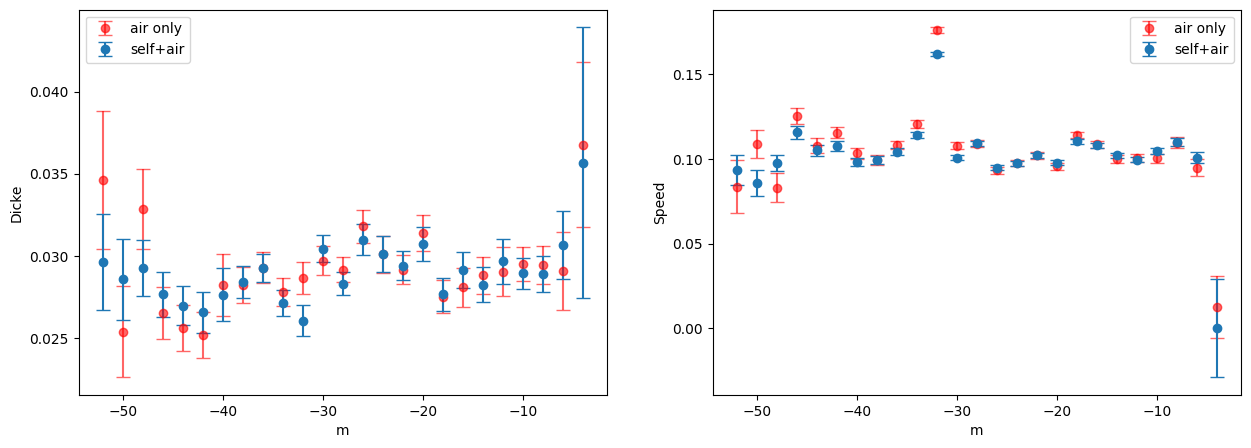

In [147]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.errorbar(airdf['m'][1:], airdf['Dicke'][1:], yerr=airdf['Dicke_err'][1:], fmt='o',  color = 'r', capsize=5, label = 'air only', alpha = 0.6)
ax1.errorbar(filteryyy['m'], filteryyy['Dicke'], yerr=filteryyy['Dicke_err'], fmt='o', capsize=5, label = 'self+air')
ax1.set_xlabel('m')
ax1.set_ylabel('Dicke')
ax1.legend()

ax2.errorbar(airdf['m'][1:], airdf['Speed'][1:], yerr=airdf['Speed_err'][1:], fmt='o', capsize=5,  color = 'r', label = 'air only', alpha=0.6)
ax2.errorbar(filteryyy['m'], filteryyy['Speed'], yerr=filteryyy['Speed_err'], fmt='o', capsize=5, label = 'self+air')
ax2.set_xlabel('m')
ax2.set_ylabel('Speed')
ax2.legend()


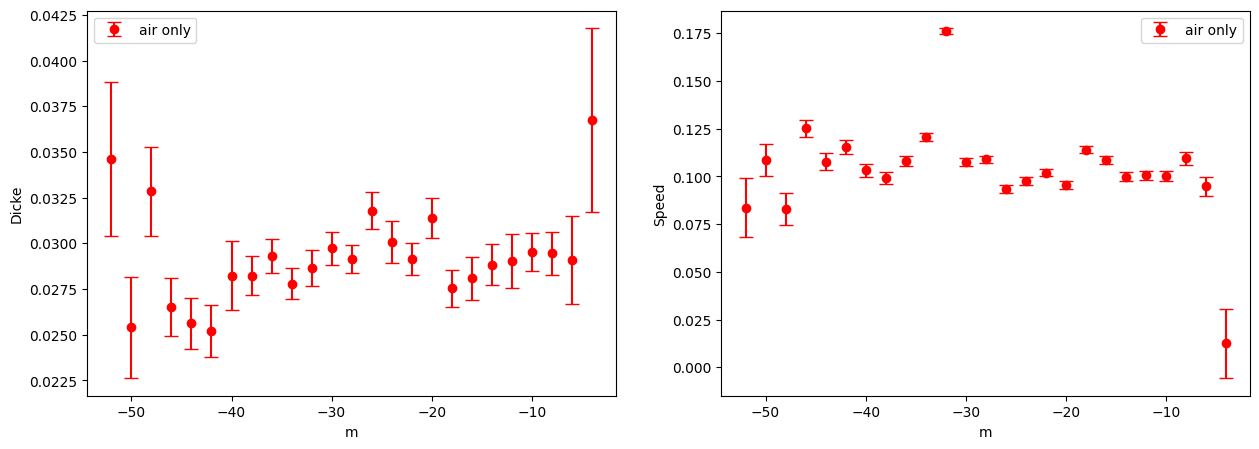

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
#ax1.errorbar(filteryyy['m'], filteryyy['Dicke'], yerr=filteryyy['Dicke_err'], fmt='o', capsize=5, label = 'self+air')
ax1.errorbar(airdf['m'][1:], airdf['Dicke'][1:], yerr=airdf['Dicke_err'][1:], fmt='o',  color = 'r', capsize=5, label = 'air only')
ax1.set_xlabel('m')
ax1.set_ylabel('Dicke')
ax1.legend()

ax2.errorbar(airdf['m'][1:], airdf['Speed'][1:], yerr=airdf['Speed_err'][1:], fmt='o', capsize=5,  color = 'r', label = 'air only')
#ax2.errorbar(filteryyy['m'], filteryyy['Speed'], yerr=filteryyy['Speed_err'], fmt='o', capsize=5, label = 'self+air')
ax2.set_xlabel('m')
ax2.set_ylabel('Speed')
ax2.legend()


### Extract code

In [107]:
edf = pd.read_csv('code.csv')

In [108]:
filter = edf[(edf['Dicke'] != 0) & (edf['Speed'] != 0)]

In [109]:
filter

,Code,Gas,Iso,Position,Dicke,Mixing,Speed
346,164.0,CO2,1.0,2035.405410000000074,0.00922,0.0000000,0.06875
364,173.0,CO2,1.0,2036.908181000000013,0.00431,0.0000000,0.10447
430,205.0,CO2,1.0,2038.414164000000028,0.00749,0.0000000,0.08239
470,225.0,CO2,1.0,2039.923250000000053,0.00657,0.0000000,0.08847
504,241.0,CO2,1.0,2041.435336999999890,0.00654,0.0000000,0.09073
540,257.0,CO2,1.0,2042.950323000000026,0.00486,0.0000000,0.09446
572,272.0,CO2,1.0,2044.468112999999903,0.00398,0.0000000,0.09565
610,291.0,CO2,1.0,2045.988614000000098,0.00475,0.0000000,0.09548
654,312.0,CO2,1.0,2047.511737000000039,0.00498,0.0000000,0.09594
688,329.0,CO2,1.0,2049.037397000000055,0.00360,0.0000000,0.09983


In [31]:
code = np.array(filter['Code']).astype(int)
code

array([164, 173, 205, 225, 241, 257, 272, 291, 312, 329, 373, 436, 471,
       507, 526, 538, 552, 566, 604, 632, 650, 691, 705, 715, 725])

## Auto .cal to .uus

In [34]:
sdf = pd.read_csv('sample_13.csv') 
sdf.set_index('Run')

,Pressure (mbar),Mixing ratio,Spectral resolution (cm-1),Point spacing,Pathlength(m),Pressure(torr),FOV,MOPD,file,hitran gas code,nu_min,nu_max,ap_code,sim_run_num
Run,,,,,,,,,,,,,,
1,20.54,1.000000,0.003,0.0015,1.6580,15.406266960,0.0000076,300,newver_ils_ogparam_r1,2,2000,2150,0,4
2,50.10,1.000000,0.006,0.0030,1.6580,37.578090300,0.0000076,150,newver_ils_ogparam_r2,2,2000,2150,0,6
3,101.24,1.000000,0.006,0.0030,0.8503,75.936244760,0.0000076,150,newver_ils_ogparam_r3,2,2000,2150,0,6
4,214.73,1.000000,0.006,0.0030,0.8503,161.060745100,0.0000076,150,newver_ils_ogparam_r4,2,2000,2150,0,6
5,300.03,1.000000,0.006,0.0030,0.8503,225.041006700,0.0000076,150,newver_ils_ogparam_r5,2,2000,2150,0,6
6,11.79,0.143551,0.003,0.0015,19.3430,8.843227239,0.0000076,300,newver_ils_ogparam_r6,2,2000,2150,0,4
7,47.33,0.031886,0.006,0.0030,19.3430,35.500419440,0.0000076,150,newver_ils_ogparam_r7,2,2000,2150,0,6
8,75.19,0.049121,0.006,0.0030,19.3430,56.397137920,0.0000076,150,newver_ils_ogparam_r8,2,2000,2150,0,6
9,112.05,0.042584,0.006,0.0030,19.3430,84.044411550,0.0000076,150,newver_ils_ogparam_r9,2,2000,2150,0,6


### Add noise

In [35]:
def add_noise(arr, snr):
    arr_noisy = arr + np.max(arr)*np.random.normal(loc = 0, scale =1, size = len(arr))*1/snr 
    return arr_noisy

In [36]:
def read_cal(sdf):
    dfl = []
    for index, row in sdf.iterrows():
        df = pd.read_csv(f'{row['file']}.cal', sep='\s+', header=None, names=[r'Wavenumber ($cm^{-1}$)', 'Transmittance'])
        dfl.append(df)
    return dfl

In [37]:
def adding(labfit, sdf, snr):
    for index, row in sdf.iterrows(): 
        i = index
        arr = labfit[i]['Transmittance']
        labfit[i]['Transmittance_noisy'] = add_noise(arr, snr)
        labfit[i].to_csv(f'{row['file']}_snr{snr}.csv', index = False)

        labfit[i][r'Wavenumber ($cm^{-1}$)'] = labfit[i][r'Wavenumber ($cm^{-1}$)'].apply(lambda x: f"{x:.4f}")
        numlen = len(labfit[i])
        num_line = pd.DataFrame({r'Wavenumber ($cm^{-1}$)':numlen, 'Transmittance':np.nan, 'Transmittance_noisy':np.nan}, index =[0])
        labfit[i] = pd.concat([num_line, labfit[i]]).reset_index(drop = True)
        labfit[i][[r'Wavenumber ($cm^{-1}$)', 'Transmittance_noisy']].to_csv(f'{row['file']}_snr{snr}.asc', sep = ' ', index = False, header = False)

In [39]:
adding(read_cal(sdf), sdf, 2000)

### asc to uus(bom +cond)

In [40]:
def spec_bin(sdf, snr):
    for index, row in sdf.iterrows():
        p1 = f'{row['file']}_snr{snr}.asc'
        p2 = f'{row['file']}_snr{snr}.bin'

        process = subprocess.Popen(['bomemcnv.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n\n")

        process.wait()        

In [41]:
def spec_cond(sdf, snr):
    for index, row in sdf.iterrows():
        run = index+1
        p1 = f'{row['file']}_snr{snr}.bin'
        p2 = f'{row['file']}_snr{snr}.uus'
        p3 = 'N'
        p4 = f"{run}" #run number
        p5 = 'A' #for fts spec
        p6 = 'No'
        p7 = f"{row['MOPD']}"
        p8 = f"{row['FOV']}"
        p9 = f"{row['hitran gas code']}" #gas code for first absorber
        p10 = '0' #only 1 absorbing gas  
        p11 = f"{row['Mixing ratio']}"
        p12 = 'n' #only one path
        p13 = f"{row['Pathlength(m)']}"
        p14 = f"{row['Pressure(torr)']}"
        p15 = 22.85 #temp
        p16 = f"{row['nu_min']}"
        p17 = f"{row['nu_max']}"
        p18 = f"{row['Point spacing']}"
        p19 = '0' #Fraction of first path triple passed
        p20 = 'y'
        p21 = 'y'
        p22 = f"{row['ap_code']}"
        

        process = subprocess.Popen(['condense.exe'], stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        process.communicate(input=f"{p1}\n{p2}\n{p3}\n{p4}\n{p5}\n{p6}\n{p7}\n{p8}\n{p9}\n{p10}\n{p11}\n{p12}\n{p13}\n{p14}\n{p15}\n{p16}\n{p17}\n{p18}\n{p19}\n{p20}\n{p21}\n{p22}\n")

        process.wait()   

In [44]:
spec_bin(sdf, 2000)

In [45]:
spec_cond(sdf, 2000)

## .dtl get param 